In [1]:
#http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html
from matplotlib import pyplot as plot
from nltk.probability import ELEProbDist, FreqDist
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import defaultdict
from nltk.tokenize import word_tokenize
import json
import nltk
import pandas as pd
import numpy as np
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
from string import punctuation


# import punkt
from nltk.tokenize import TreebankWordTokenizer
import nltk.tokenize.punkt
from nltk.probability import FreqDist

In [2]:
SWdf = pd.read_csv('NLPout.csv')
#neg = lines = text_file.read().split(',')('negative-words.txt')
#pos = pd.read_dcs('positive-words.txt')
neg = 'negative-words.txt'
pos = 'positive-words.txt'
import codecs
with codecs.open(neg, "r",encoding='utf-8', errors='ignore') as fdata:
    neg = fdata.read()
with codecs.open(pos, "r",encoding='utf-8', errors='ignore') as fdata:
    pos = fdata.read()   
#neg = neg.replace("\r\n", ",")
#pos = pos.replace("\r\n", ",")

In [3]:
d = {"RED LEADER": "RED_LEADER","BEN'S VOICE":"BEN","LUKE'S VOICE":'LUKE',"HAN'S VOICE":"HAN", "FIRST TROOPER":"TROOPER", "TROOPER VOICE":"TROOPER"}
SWdf = SWdf.replace(d)

In [4]:
chars = [ 'LEIA', 'BEN','LUKE','HAN','TROOPER','VADER','WEDGE','THREEPIO','TARKIN','RED_LEADER','OFFICER','JABBA','BIGGS']
#'LUKE','HAN'
ccorpus = SWdf.loc[SWdf['char'].isin(chars)]
ccorpus = ccorpus[['text','char']]

trainx, testx = train_test_split(ccorpus, test_size=0.2)

In [5]:
trainA = SWdf.apply(tuple, axis=1)

In [6]:
trainy = trainx.apply(tuple, axis=1)
len(trainy)

684

In [7]:
analyser = SentimentIntensityAnalyzer()

In [8]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt

In [9]:
def print_sentiment_scores(tweets):
    sent = analyser.polarity_scores(tweets)
    slist = pd.Series([sent['pos'], sent['neg'], sent['neu'], sent['compound']])
    return slist

In [10]:
dat1 = []
dat2 = []
for (words, cclass) in trainy:
    score = print_sentiment_scores(words)
    #print(score)
    #print(words_filtered)
    dat1.append({'line': words, 'char': cclass})
    dat2.append(score)
dat1 = pd.DataFrame(dat1)
dat2 = pd.DataFrame(dat2)
dat2.rename(columns={0: 'pos', 1: 'neg', 2: 'neu', 3: 'comp'}, inplace=True)
sent = pd.concat([dat1, dat2], axis=1)

#df

In [11]:
sent['comp'].max()

0.9468

In [12]:
sent['char'].value_counts()

LUKE          199
HAN           127
THREEPIO       90
BEN            64
LEIA           48
VADER          37
BIGGS          28
RED_LEADER     24
TROOPER        22
TARKIN         20
WEDGE          12
OFFICER         9
JABBA           4
Name: char, dtype: int64

In [13]:
agg = sent.groupby('char').mean()


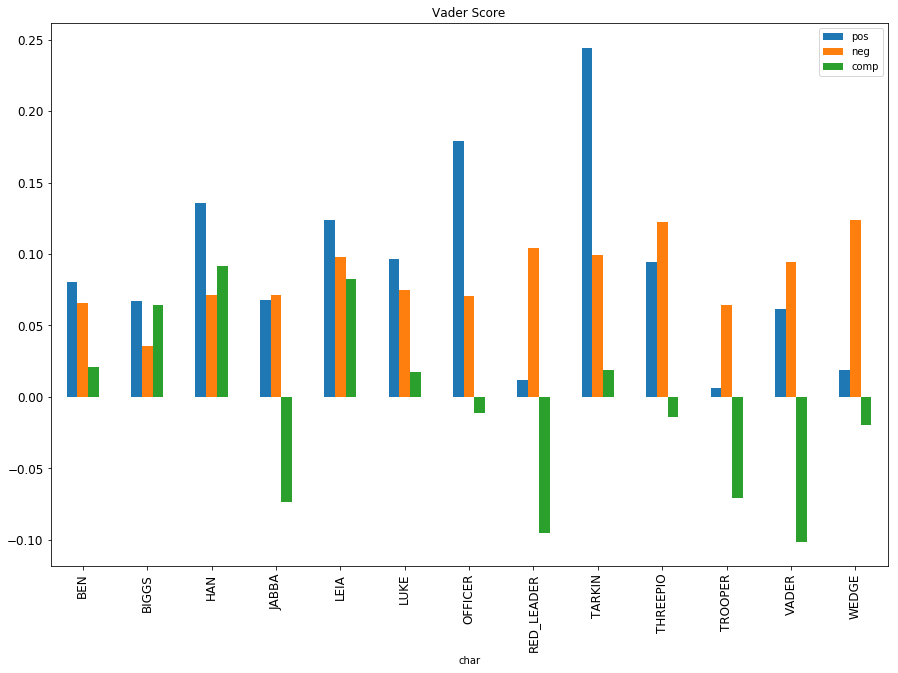

In [14]:
import matplotlib.pyplot as plt
ax = agg[['pos','neg','comp']].plot(kind='bar', title ="Vader Score", figsize=(15, 10), legend=True, fontsize=12)
#ax.set_xlabel(chars, fontsize=12)
plt.show()